## molecular_descriptors.csv Dataset description

### Context

Ligand-based virtual screening methods are based on the search of ligand similarity by comparing molecular structure descriptors and properties. This dataset contains a list of chemical descriptors used to categorize molecules according to their biological functions. These attributes can be used to classify compounds into diverse substructures and can also be used to prepare molecular databases for high-throughput and virtual screening.


### Content

This dataset contains data on 145 instances (i.e. molecules) belonging to three different classes (1,2 and 3). The three classes correspond to: 

1) molecules that are known to bind the cyclooxygenase 1 (COX1) enzyme;

2) molecules that are known to bind the HIV-1 protease;

3) molecules that are known to bind the Cytochrome C peroxidase enzyme.

In particular, there are 45 molecules belonging to the first class, 59 to the second and 41 to the third.


Each instance of the dataset is characterized by 8 numerical attributes corresponding to 8 molecular descriptors (D1-D8) and 1 categorical attribute (i.e. the corresponding class: 1, 2 or 3).


1) Import the relevant Python libraries and modules

In [89]:
# Importing necessary libraries
import pandas as pd  # For handling data in DataFrame format
import numpy as np  # For numerical operations and handling arrays
import matplotlib.pyplot as plt  # For data visualization and plotting
import seaborn as sns  # For statistical data visualization
import plotly.express as px  # For interactive graphs and visualizations
import plotly.graph_objects as go  # For creating detailed interactive visualizations
from plotly.subplots import make_subplots #For creating subplots
from sklearn.preprocessing import StandardScaler  # For autoscaling and standardizing data
from IPython.display import display  # Import display function to render the DataFrame


# Import useful libraries for PCA
from sklearn import decomposition  # For performing Principal Component Analysis (PCA)
from sklearn.pipeline import make_pipeline  # For creating machine learning pipelines


2) Read the molecular_descriptors.csv file and import its content as a DataFrame using Pandas

In [91]:
moldesc_df = pd.read_csv("molecular_descriptors.csv", sep=",", header=0)

3) Display the full data and inspect its info

In [93]:
# Display the full data in a scrollable format 
pd.set_option('display.max_rows', None)  # Show all rows in the output
pd.set_option('display.max_columns', None)  # Show all columns in the output
display(moldesc_df)  # Display the complete DataFrame

,D1,D2,D3,D4,D5,D6,D7,D8,Class
0,21.996307,119.300545,42,-0.129873,-0.461116,2.354662,0.739296,0.475639,1
1,18.002651,111.988098,38,-0.192031,-0.003431,0.010324,0.772352,0.479507,1
2,26.002590,196.702667,56,0.012251,-0.149585,0.937021,0.546386,0.348632,1
3,22.004517,119.300545,42,-0.103873,-0.357562,1.760567,0.720476,0.462141,1
4,23.003124,169.373093,50,-0.161954,-0.516773,2.444123,0.743189,0.451499,1
5,10.001482,45.800003,20,-0.001307,-0.005326,0.025180,0.625161,0.397128,1
6,20.003008,104.804337,38,-0.155427,-0.316281,1.652655,0.767007,0.502759,1
7,15.002267,81.028572,30,-0.175913,-0.267525,1.026331,0.742105,0.461606,1
8,17.003408,101.388100,36,-0.217380,-0.009711,0.039880,0.795678,0.503703,1
9,29.999311,239.983139,64,-0.062927,-0.130794,0.258319,0.630174,0.377212,1


In [94]:
#Inspect its info
moldesc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   D1      145 non-null    float64
 1   D2      145 non-null    float64
 2   D3      145 non-null    int64  
 3   D4      145 non-null    float64
 4   D5      145 non-null    float64
 5   D6      145 non-null    float64
 6   D7      145 non-null    float64
 7   D8      145 non-null    float64
 8   Class   145 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 10.3 KB


- The dataset consists of **145 molecular instances**, each characterized by **8 numerical attributes** (D1-D8) and **1 categorical attribute** (Class).
- Data types are as follows:
  - **7 attributes** (D1-D8) are of type `float64`, representing continuous numerical values.
  - **2 attributes** (D3 and Class) are of type `int64`, representing discrete values.
- The "Class" attribute categorizes molecules into three distinct groups (1, 2, and 3).


4) Produce a scatter plot for the attribute "D1", where the instances need to be colored according to their respective class

In [97]:
import plotly.express as px


scatter_fig = px.scatter(
    moldesc_df,
    x=moldesc_df.index,        # Uses the DataFrame index as the x-axis
    y="D1",                    # "Descriptor 1" as the y-axis
    color="Class",             # Colors the points based on "Class"
    hover_data=['Class']       # Displays the class information on hovering
    
)


scatter_fig.update_layout(
    height=600,
    width=800,
    title_text='Scatter plot of D1 by class',
    xaxis_title='Instance index',
    yaxis_title='D1'
)


scatter_fig.show()


This scatter plot visualizes the molecular descriptor **D1**, categorized by molecular classes. In this visualization, the color bar representation is used to distinguish the classes. However, since the "Class" attribute contains only three discrete values (1, 2, and 3), representing them with a continuous color bar is not meaningful.

- Treating categorical variables as discrete categories ensures consistency in data visualization best practices.
- Converting the "Class" attribute to string format avoids the automatic generation of a continuous color scale and presents the data more accurately.

In [99]:
import plotly.express as px

# Create the scatter plot with Plotly
fig = px.scatter(
    moldesc_df,
    x=moldesc_df.index,        # Use the DataFrame index as the x-axis
    y="D1",                    # "D1" as the y-axis
    color=moldesc_df['Class'].astype(str),  # Convert "Class" to string to avoid a color bar
    hover_data=['Class']       # Display the class information on hover
)

# Update the layout of the plot
fig.update_layout(
    height=600,
    width=800,
    title_text='Scatter plot of D1 by class',
    xaxis_title='Instance index',
    yaxis_title='D1 value',
    legend_title_text='Class'  # Update legend title
)

# Show the plot
fig.show()


### Scatter plot analysis of D1 by class

- The data points are distinctly clustered, suggesting that the "D1" descriptor provides a clear differentiation among the three molecular classes.
- Class 1 (colored blue) has lower values of D1, primarily in the range of **10-30**.
- Class 2 (colored red) shows higher values, mostly in the range of **30-65**.
- Class 3 (colored green) exhibits the lowest values, concentrated in the range of **5-10**, indicating a different molecular behavior.

- There is a noticeable gap between the clusters of classes, which may suggest that the descriptor D1 alone could provide meaningful classification insights.


5) Produce an image (by using Seaborn functionalities) with 3 box-plots (one per class) to show the distribution of values of the "D2" attribute

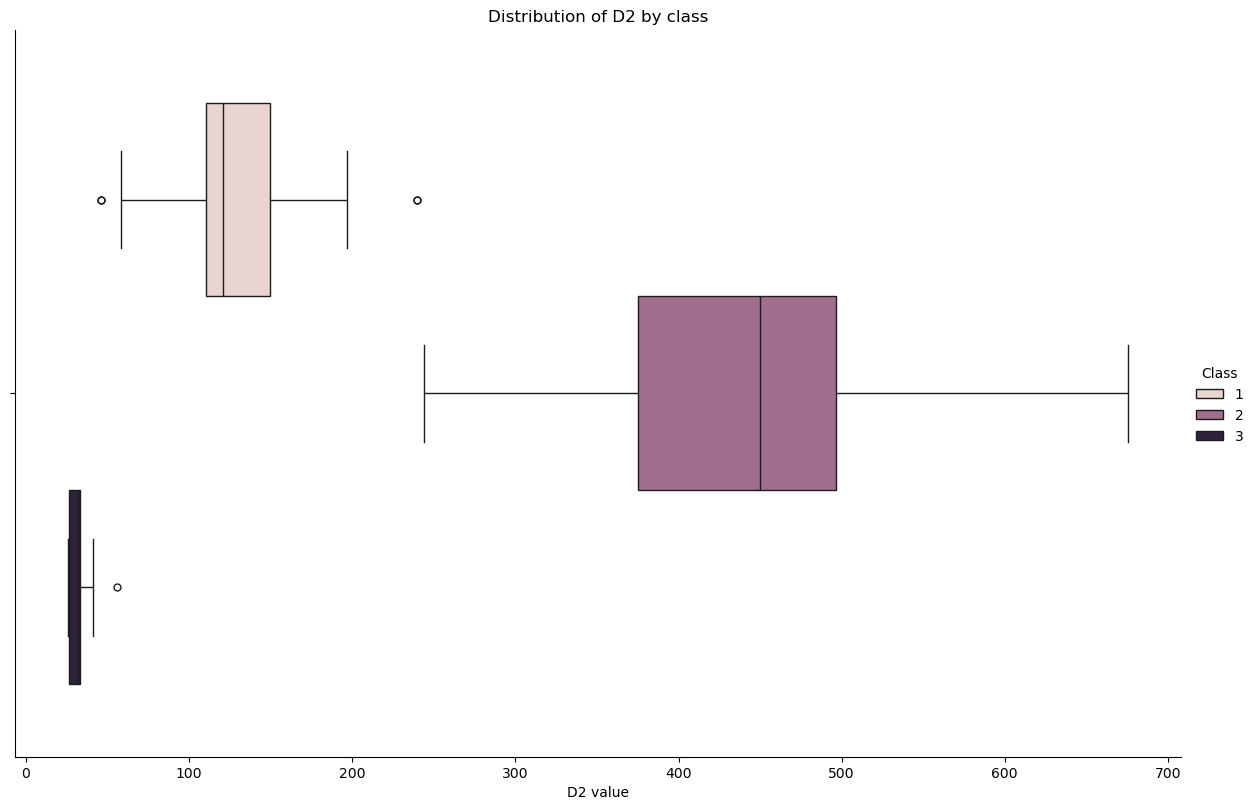

In [102]:
sns.catplot(moldesc_df, 
            x=moldesc_df["D2"], 
            hue=moldesc_df["Class"], 
            aspect = 1.5, 
            kind="box",
            height = 8)

plt.xlabel("D2 value")
plt.title("Distribution of D2 by class")
plt.show()

### Box Plot analysis of D2 by class
 
   - Class 1 and Class 3 have relatively narrow distributions, with Class 3 showing the smallest range of D2 values.
   - Class 2 exhibits the widest range, indicating greater variability in D2 values.


   - Class 1 and Class 3 contain a few outliers, while Class 2 does not show any visible outliers, indicating a more consistent spread.

   - Class 3 has the lowest values, Class 1 falls within a mid-range, and Class 2 covers the highest values, suggesting that D2 could be a useful descriptor for distinguishing between these molecular classes.


6) Build the 8x8 Correlation Matrix (just for the first 8 numerical attributes), print it and plot it (by using Seaborn functionalities) with a color scale

In [105]:
#Computing correlation matrix of the 8 attributes 
moldesc_df[moldesc_df.columns[0:8]].corr()

,D1,D2,D3,D4,D5,D6,D7,D8
D1,1.000000,0.995182,0.998650,-0.255810,0.174931,-0.196771,0.195719,-0.090956
D2,0.995182,1.000000,0.995364,-0.218168,0.203504,-0.224917,0.168198,-0.112945
D3,0.998650,0.995364,1.000000,-0.243285,0.186418,-0.208930,0.182235,-0.107476
D4,-0.255810,-0.218168,-0.243285,1.000000,0.077383,-0.075836,-0.938369,-0.862068
D5,0.174931,0.203504,0.186418,0.077383,1.000000,-0.982521,-0.088560,-0.170986
D6,-0.196771,-0.224917,-0.208930,-0.075836,-0.982521,1.000000,0.098398,0.192691
D7,0.195719,0.168198,0.182235,-0.938369,-0.088560,0.098398,1.000000,0.937839
D8,-0.090956,-0.112945,-0.107476,-0.862068,-0.170986,0.192691,0.937839,1.000000


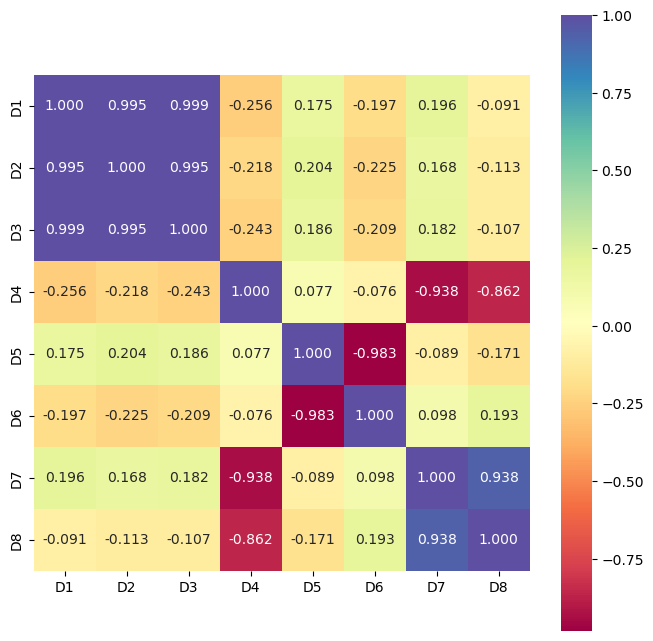

In [106]:
#Visual analysis of correlation

cmap= sns.color_palette("Spectral", as_cmap=True) #Diverging palette for better visualization

plt.figure(figsize=(8, 8))
sns.heatmap(moldesc_df[moldesc_df.columns[0:8]].corr(), annot=True, fmt='.3f', cmap = cmap, square=True)

plt.show()

### Correlation Matrix analysis

- D1, D2, and D3 are highly correlated (close to 1).
- D7 and D8 also show a strong positive correlation (0.938), while D5 and D6 exhibit a strong negative correlation (-0.983), indicating that as one increases, the other decreases sharply.
- D4 shows a negative correlation with both D7 and D8, implying an inverse relationship between these descriptors.

- Highly correlated features (such as D1, D2, D3) could be considered for dimensionality reduction techniques such as PCA.
- Attributes with low correlations may represent diverse molecular properties and should be explored further for their individual contributions to classification tasks.


Now we need to run a Principal Component Analysis (PCA) on the data 

7) Define a new Dataset without the categorical attribute and perform its auto-scaling


In [109]:
# Convert 'Class' to categorical variable (from data type int to category)

moldesc_df['Class'] = moldesc_df['Class'].astype('category')

moldesc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   D1      145 non-null    float64 
 1   D2      145 non-null    float64 
 2   D3      145 non-null    int64   
 3   D4      145 non-null    float64 
 4   D5      145 non-null    float64 
 5   D6      145 non-null    float64 
 6   D7      145 non-null    float64 
 7   D8      145 non-null    float64 
 8   Class   145 non-null    category
dtypes: category(1), float64(7), int64(1)
memory usage: 9.5 KB


In [110]:
#Separating dataset w/o categorical attribute

moldesc2df = moldesc_df.drop(columns=['Class'])
moldesc2df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   D1      145 non-null    float64
 1   D2      145 non-null    float64
 2   D3      145 non-null    int64  
 3   D4      145 non-null    float64
 4   D5      145 non-null    float64
 5   D6      145 non-null    float64
 6   D7      145 non-null    float64
 7   D8      145 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 9.2 KB


The 'Class' column, which was originally an integer type, was converted to a categorical data type and was removed from the dataset to avoid any unintended influence on the principal component calculations.
This results in a new dataset containing only the 8 numerical molecular descriptors (D1-D8).

In [112]:
moldesc2df

,D1,D2,D3,D4,D5,D6,D7,D8
0,21.996307,119.300545,42,-0.129873,-0.461116,2.354662,0.739296,0.475639
1,18.002651,111.988098,38,-0.192031,-0.003431,0.010324,0.772352,0.479507
2,26.002590,196.702667,56,0.012251,-0.149585,0.937021,0.546386,0.348632
3,22.004517,119.300545,42,-0.103873,-0.357562,1.760567,0.720476,0.462141
4,23.003124,169.373093,50,-0.161954,-0.516773,2.444123,0.743189,0.451499
5,10.001482,45.800003,20,-0.001307,-0.005326,0.025180,0.625161,0.397128
6,20.003008,104.804337,38,-0.155427,-0.316281,1.652655,0.767007,0.502759
7,15.002267,81.028572,30,-0.175913,-0.267525,1.026331,0.742105,0.461606
8,17.003408,101.388100,36,-0.217380,-0.009711,0.039880,0.795678,0.503703
9,29.999311,239.983139,64,-0.062927,-0.130794,0.258319,0.630174,0.377212


Before applying Principal Component Analysis (PCA), it is crucial to standardize the dataset to ensure that all numerical features contribute equally to the analysis.

In [114]:
#Initialize scaler
std_scaler = StandardScaler(copy=True, #Ensures the original data remains unchanged
                            with_mean=True, #Centers the data (mean = 0)
                            with_std=True) #Scales the data to unit variance (standard deviation = 1)

# Autoscale the data
moldesc2df_autosc = std_scaler.fit_transform(moldesc2df)

# Convert the autoscaled data (numpy array) into a pandas dataframe
moldesc2df_autosc = pd.DataFrame(moldesc2df_autosc)
moldesc2df_autosc.columns = moldesc2df.columns
moldesc2df_autosc.index = moldesc2df.index
moldesc2df_autosc

,D1,D2,D3,D4,D5,D6,D7,D8
0,-0.311986,-0.580564,-0.429585,-0.654378,-3.232894,3.453128,0.883433,1.284370
1,-0.543405,-0.618878,-0.536796,-1.540196,0.618624,-0.621476,1.356215,1.373242
2,-0.079836,-0.175010,-0.054345,1.371042,-0.611293,0.989181,-1.875652,-1.633766
3,-0.311511,-0.580564,-0.429585,-0.283850,-2.361464,2.420554,0.614261,0.974238
4,-0.253645,-0.318205,-0.215162,-1.111567,-3.701259,3.608617,0.939112,0.729725
5,-1.007044,-0.965675,-1.019247,1.177825,0.602677,-0.595655,-0.748976,-0.519513
6,-0.427491,-0.656518,-0.536796,-1.018550,-2.014076,2.232997,1.279768,1.907485
7,-0.717266,-0.781093,-0.751218,-1.310498,-1.603784,1.144407,0.923609,0.961946
8,-0.601307,-0.674418,-0.590401,-1.901447,0.565777,-0.570106,1.689833,1.929174
9,0.151759,0.051761,0.160078,0.299674,-0.453163,-0.190445,-0.677278,-0.977107


The `describe()` function is used to confirm that the mean of each standardized feature is approximately **0**, and the standard deviation is **1**, indicating successful standardization

In [116]:
moldesc2df_autosc.describe() 

,D1,D2,D3,D4,D5,D6,D7,D8
count,1.450000e+02,145.000000,145.000000,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02,1.450000e+02
mean,-1.225074e-17,0.000000,0.000000,7.350442e-17,-6.737905e-17,6.125368e-18,3.675221e-17,5.390324e-16
std,1.003466e+00,1.003466,1.003466,1.003466e+00,1.003466e+00,1.003466e+00,1.003466e+00,1.003466e+00
min,-1.181044e+00,-1.071165,-1.180063,-2.688391e+00,-3.957385e+00,-6.394199e-01,-3.158381e+00,-2.188227e+00
25%,-1.065018e+00,-0.999558,-1.072852,-6.543782e-01,-3.135208e-01,-6.225242e-01,-6.772783e-01,-6.028706e-01
50%,-3.118940e-01,-0.426000,-0.322373,3.641415e-02,4.909738e-01,-4.650923e-01,1.076255e-01,-8.590638e-02
75%,1.021280e+00,1.001597,1.071373,7.375670e-01,6.407646e-01,2.758435e-01,7.845316e-01,7.369168e-01
max,2.065516e+00,2.335173,2.036275,1.876228e+00,8.696585e-01,4.327092e+00,2.144966e+00,2.707998e+00


8 ) Run a PCA analysis on the auto-scaled data by selecting the maximum number of possible components for this case and produce a Scree plot

In [118]:
# Create a pipeline object
pipe = make_pipeline(
    StandardScaler(), # Perform autoscaling
    decomposition.PCA(n_components=8) # Define the PCA model (using the max number of PCs - equal to the number of variables)
)

# Train PCA model
pipe.fit(moldesc2df)

# Apply PCA on the dataset
scores = pipe.fit_transform(moldesc2df)
scores

# Access the PCA step from the pipeline
pca_step = pipe.named_steps['pca']
pca_step

# Get the explained variance ratio
explained_variance = pca_step.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Get the cumulative variance
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative variance:", cumulative_variance)

Explained Variance Ratio: [4.17787787e-01 3.58836934e-01 2.07432607e-01 1.09191632e-02
 2.49743537e-03 1.96466606e-03 4.24418585e-04 1.36988099e-04]
Cumulative variance: [0.41778779 0.77662472 0.98405733 0.99497649 0.99747393 0.99943859
 0.99986301 1.        ]


In [119]:
import plotly.express as px
import plotly.graph_objects as go

# Plotly scree plot with explained variance ratio and cumulative explained variance
fig = go.Figure()

# Scree plot
fig.add_trace(go.Scatter(
    x=[f'PC{i+1}' for i in range(8)],
    y=explained_variance,
    mode='lines+markers',
    name='Explained Variance',
    line=dict(color='royalblue')
))

# Cumulative explained variance
fig.add_trace(go.Scatter(
    x=[f'PC{i+1}' for i in range(8)],
    y=cumulative_variance,
    mode='lines+markers',
    name='Cumulative Variance',
    line=dict(color='firebrick')
))

fig.update_layout(
    title='Scree Plot with Cumulative & Explained Variance',
    xaxis_title='Principal Components',
    yaxis_title='Explained Variance',
    template='plotly_dark'
)

fig.show()

### Explained and Cumulative variance analysis

1. **Explained Variance:** 
   - The explained variance ratio indicates how much variance each principal component contributes to the total variance. The explained variance (blue line) across principal components shows a steep drop after the first three components, indicating diminishing returns for additional components.

2. **Cumulative Variance:**  
   - The cumulative variance represents the total proportion of variance explained as more components are added (red line). The plot suggests that the first three components are sufficient to describe most of the data variability, while additional components contribute minimally.

These insights indicate that dimensionality can be effectively reduced to three principal components without significant loss of information.


9 ) Run a PCA analysis on the auto-scaled data by selecting a number of components = 3

In [122]:
#Run a PCA analysis on the auto-scaled data by selecting a number of components = 3
#Now re-build the model 3 PCs
pipe = make_pipeline(
    StandardScaler(),
    decomposition.PCA(n_components=3) # Using 3 PCs as suitable number
)

# Get the scores of this PCA model
scores = pipe.fit_transform(moldesc2df)

10 ) Prepare and print the Scores matrix by concatenating it with the categorial attribute (i.e. the class)

In [124]:
# Prepare the Scores dataframe (and concatenate the categorical attribute)
scores = pd.DataFrame(data = scores, columns = [f'PC{i+1}' for i in range(3)])
scores.index = moldesc_df.index

categorical_data = moldesc_df[moldesc_df.columns[-1]]  # Since last column is 'Class'

scores_withdata = pd.concat([scores, moldesc_df], axis = 1) #concatenate with all data including 'Class'

scores_withonlyclass = pd.concat([scores, categorical_data.reset_index(drop=True)], axis=1) #concate with only class column


In [125]:
scores_withdata

,PC1,PC2,PC3,D1,D2,D3,D4,D5,D6,D7,D8,Class
0,-1.186065,3.687838,-3.279560,21.996307,119.300545,42,-0.129873,-0.461116,2.354662,0.739296,0.475639,1
1,0.366450,1.991757,1.909667,18.002651,111.988098,38,-0.192031,-0.003431,0.010324,0.772352,0.479507,1
2,-1.565084,-1.877515,-1.813386,26.002590,196.702667,56,0.012251,-0.149585,0.937021,0.546386,0.348632,1
3,-1.090178,2.634293,-2.284194,22.004517,119.300545,42,-0.103873,-0.357562,1.760567,0.720476,0.462141,1
4,-0.938838,3.728481,-3.820418,23.003124,169.373093,50,-0.161954,-0.516773,2.444123,0.743189,0.451499,1
5,-1.932183,-1.081749,0.961158,10.001482,45.800003,20,-0.001307,-0.005326,0.025180,0.625161,0.397128,1
6,-0.627563,3.680706,-1.454182,20.003008,104.804337,38,-0.155427,-0.316281,1.652655,0.767007,0.502759,1
7,-0.820877,2.764023,-0.623427,15.002267,81.028572,30,-0.175913,-0.267525,1.026331,0.742105,0.461606,1
8,0.536644,2.677597,2.118314,17.003408,101.388100,36,-0.217380,-0.009711,0.039880,0.795678,0.503703,1
9,-0.260192,-0.972099,-0.624451,29.999311,239.983139,64,-0.062927,-0.130794,0.258319,0.630174,0.377212,1


In [126]:
scores_withonlyclass

,PC1,PC2,PC3,Class
0,-1.186065,3.687838,-3.279560,1
1,0.366450,1.991757,1.909667,1
2,-1.565084,-1.877515,-1.813386,1
3,-1.090178,2.634293,-2.284194,1
4,-0.938838,3.728481,-3.820418,1
5,-1.932183,-1.081749,0.961158,1
6,-0.627563,3.680706,-1.454182,1
7,-0.820877,2.764023,-0.623427,1
8,0.536644,2.677597,2.118314,1
9,-0.260192,-0.972099,-0.624451,1


The **scores matrix** provides the representation of the original data in a reduced-dimensional space defined by the principal components.

The molecular classes are now represented in a reduced 3D space (PC1, PC2, PC3).
   - Class 1 molecules tend to have negative PC1 values, whereas Class 2 molecules are predominantly located in the positive PC1 region.
   - Class 3 molecules exhibit a distinctive pattern, occupying different regions in PC2 and PC3 space.

The scores matrix reflects how well each sample is represented in the new space. PC1 contributes the most variance to the dataset, meaning it captures the largest differences between molecular classes. PC2 and PC3 also contribute to differentiation, but their impact diminishes compared to PC1.

A few instances within the same class show deviations from their cluster, indicating potential outliers.
  

11) Prepare and print the Loadings matrix (remember to include the index with the names of the attributes and to add a last column with their names)

In [129]:
# Prepare the loadings dataframe
pca_step = pipe.named_steps['pca']
loadings = pd.DataFrame(pca_step.components_.T,
                        columns=[f'PC{i+1}' for i in range(3)],
                        index=moldesc_df.columns[:-1])  # Use only numerical descriptors as the index

loadings


,PC1,PC2,PC3
D1,0.505403,-0.146883,-0.223696
D2,0.501256,-0.167600,-0.211573
D3,0.503748,-0.156816,-0.219745
D4,-0.300791,-0.457599,-0.155347
D5,0.164025,-0.302653,0.620302
D6,-0.172472,0.311807,-0.607763
D7,0.275737,0.485412,0.176195
D8,0.128034,0.540278,0.218131


### PCA Loadings matrix analysis

The **loadings matrix** represents the contribution of each original variable (molecular descriptor) to the principal components. 

   - Each row in the matrix corresponds to an original molecular descriptor (D1-D8).
   - Each column (PC1, PC2, PC3) shows the contribution (or weight) of the respective descriptor to that principal component.
   - Higher absolute values in the loadings indicate a stronger influence of that descriptor on the corresponding principal component.

   - **PC1 :**  
     - Strong positive contributions from `D1`, `D2`, and `D3`, meaning these descriptors contribute significantly to the variance captured by PC1.
     - Negative contribution from `D4`, indicating it influences PC1 in the opposite direction.
   - **PC2 :**  
     - Descriptors `D7` and `D8` have the highest positive contributions, suggesting they primarily define PC2.
     - Descriptor `D4` contributes negatively, indicating a contrasting pattern relative to the others.
   - **PC3 :**  
     - Descriptors `D5` and `D6` contribute in opposite directions, with `D5` having a strong positive influence and `D6` a strong negative one.

   - Variables with near-zero loadings contribute minimally to that principal component.



12 ) Prepare a plot of the Scores (using plotly) for PC1 and PC2 where the instances are colored according to their class;

In [132]:
# Plot the scores - 2D

fig = px.scatter(scores_withdata, #with complete data
                 x='PC1',
                 y='PC2',
                 color= 'Class', 
                 labels={
                     'PC1': f'Principal Component 1 ({explained_variance[0] * 100:.2f}% EV)',
                     'PC2': f'Principal Component 2 ({explained_variance[1] * 100:.2f}% EV)'
                 },
                 title='Scores Plot: PC1 vs PC2')

# Add zerolines
fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')

fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')

# Set the layout to be square
fig.update_layout(
    width=600,
    height=600,
    xaxis=dict(range=[-5, 5]),  # Set x-axis range from -5 to 5
    yaxis=dict(range=[-5, 5])   # Set y-axis range from -5 to 5
)

fig.show()

13) Prepare a plot of the Loadings (using plotly) for PC1 and PC2.

In [134]:
# Plot the loadings - 2D
fig = px.scatter(loadings, x='PC1', y='PC2',
                 text=loadings.index,
                 labels={
                     'PC1': f'Principal Component 1 ({explained_variance[0] * 100:.2f}% EV)',
                     'PC2': f'Principal Component 2 ({explained_variance[1] * 100:.2f}% EV)'
                 },
                 title='Scores Plot: PC1 vs PC2')

# Add zerolines
fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')

# Adjust the text position for readability (optional)
fig.update_traces(textposition='top center')

# Set the layout to be square
fig.update_layout(
    width=600,
    height=600,
    xaxis=dict(range=[-0.6, 0.6]),
    yaxis=dict(range=[-0.6, 0.6])
)

fig.show()

In [135]:
# Define color mapping for categorical values (Class 1, 2, 3)
color_map = px.colors.qualitative.Vivid  

# Map each class to a color
unique_classes = scores_withonlyclass['Class'].unique()
color_dict = {category: color_map[i % len(color_map)] for i, category in enumerate(unique_classes)}

# Create subplots with two columns: Scores plot and Loadings plot
fig = make_subplots(rows=1, cols=2, subplot_titles=("Scores Plot (PC1 vs PC2)", "Loadings Plot (PC1 vs PC2)"))

# Plot the scores in the first subplot (PC1 vs PC2)
fig.add_trace(
    go.Scatter(
        x=scores_withonlyclass['PC1'],
        y=scores_withonlyclass['PC2'],
        mode='markers',
        marker=dict(
            size=8,
            color=[color_dict[category] for category in scores_withonlyclass['Class']],  # Map classes to colors
            showscale=False,  # Disable color scale for categorical representation
        ),
        text=scores_withonlyclass.index,  # Display index values on hover
        name='scores',
        showlegend=False  # Hide legend for scores plot
    ),
    row=1, col=1  # Place in the first column
)

# Plot the loadings in the second subplot (PC1 vs PC2)
fig.add_trace(
    go.Scatter(
        x=loadings['PC1'],
        y=loadings['PC2'],
        mode='markers+text',
        text=loadings.index,  # Show descriptor names
        textposition='top center',
        marker=dict(size=8),
        name='loadings',
        showlegend=False  # Hide legend for loadings plot
    ),
    row=1, col=2  # Place in the second column
)

# Add lines from the origin to each point in the loadings plot
for feature in loadings.index:
    fig.add_trace(
        go.Scatter(
            x=[0, loadings.loc[feature, 'PC1']],
            y=[0, loadings.loc[feature, 'PC2']],
            mode='lines',
            line=dict(color='gray', width=1),
            showlegend=False  # Hide legend for the lines
        ),
        row=1, col=2  # Second column
    )

# Customize axes titles
fig.update_xaxes(title_text="PC1", row=1, col=1)
fig.update_yaxes(title_text="PC2", row=1, col=1)

fig.update_xaxes(title_text="PC1 Loadings", row=1, col=2)
fig.update_yaxes(title_text="PC2 Loadings", row=1, col=2)

# Add zero lines to both subplots for better interpretation
fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black', row=1, col=1)
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black', row=1, col=1)

fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black', row=1, col=2)
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black', row=1, col=2)

# Set overall layout properties
fig.update_layout(
    title="PCA Scores and Loadings (PC1 vs PC2)",
    width=1000,  # Adjust the width
    height=600,  # Adjust the height
    template='plotly_white',
    legend_title="Class"
)

# Show the final plot
fig.show()


## Principal Component Analysis (PCA) observations : 

PCA successfully distinguishes the three molecular classes based on their descriptor profiles.
- Descriptors D1, D2, and D3 have high positive loadings along PC1, while D6, D7 and D8 have high positive loadings along PC2. D4 and D5 have negative contributions along PC2. 
- Descriptors closer to the origin in the loadings plot contribute less to the variance, while those further away have a stronger influence.
- Class 1 (COX1 binders - Orange) is spread along PC2, occupying both positive and negative regions of PC1. 
- Class 2 (HIV-1 protease binders - Blue) clusters in the positive PC1 region, influenced by descriptors D1, D2, and D3 have high positive loadings along PC1.
- Class 3 (Cytochrome C peroxidase binders - Green) clusters in the negative PC1 region, influenced by D4 & D6 with negative contributions along PC1. 